<a href="https://colab.research.google.com/github/jyothign0/Deep-Learning/blob/main/CNNModel_Dog_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-11-21 12:46:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   245MB/s    in 0.3s    

2021-11-21 12:46:04 (245 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

In [ ]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [ ]:
print('Number of cat images for training:',len(os.listdir(train_cats_dir)))
print('Number of dog images for training:',len(os.listdir(train_dogs_dir)))

print('Number of cat images for validation:',len(os.listdir(validation_cats_dir)))
print('Number of dog images for validation:',len(os.listdir(validation_dogs_dir)))

Number of cat images for training: 1000
Number of dog images for training: 1000
Number of cat images for validation: 500
Number of dog images for validation: 500


In [ ]:
train_cats_images=os.listdir(train_cats_dir)[:25]
print(train_cats_images)

train_dogs_images=os.listdir(train_dogs_dir)[:25]
print(train_dogs_images)


['cat.454.jpg', 'cat.138.jpg', 'cat.179.jpg', 'cat.425.jpg', 'cat.685.jpg', 'cat.15.jpg', 'cat.46.jpg', 'cat.110.jpg', 'cat.382.jpg', 'cat.608.jpg', 'cat.410.jpg', 'cat.364.jpg', 'cat.861.jpg', 'cat.259.jpg', 'cat.764.jpg', 'cat.130.jpg', 'cat.85.jpg', 'cat.909.jpg', 'cat.896.jpg', 'cat.461.jpg', 'cat.802.jpg', 'cat.396.jpg', 'cat.797.jpg', 'cat.847.jpg', 'cat.714.jpg']
['dog.407.jpg', 'dog.624.jpg', 'dog.296.jpg', 'dog.789.jpg', 'dog.414.jpg', 'dog.621.jpg', 'dog.208.jpg', 'dog.771.jpg', 'dog.807.jpg', 'dog.309.jpg', 'dog.319.jpg', 'dog.919.jpg', 'dog.422.jpg', 'dog.379.jpg', 'dog.232.jpg', 'dog.156.jpg', 'dog.192.jpg', 'dog.587.jpg', 'dog.291.jpg', 'dog.580.jpg', 'dog.602.jpg', 'dog.58.jpg', 'dog.891.jpg', 'dog.52.jpg', 'dog.881.jpg']


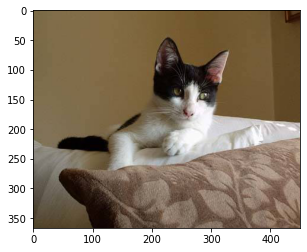

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Look at single image
cat_image_path=os.path.join(train_cats_dir,'cat.537.jpg')
cat_img=mpimg.imread(cat_image_path)
plt.imshow(cat_img)

(100, 99, 3)


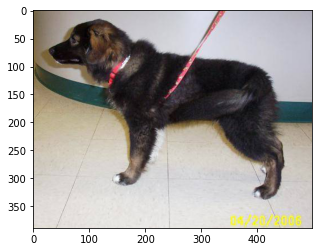

In [ ]:
dog_image_path=os.path.join(train_dogs_dir,'dog.981.jpg')
dog_img=mpimg.imread(dog_image_path)
print(dog_image.shape)
plt.imshow(dog_img)

In [ ]:
cat_image_path=[os.path.join(train_cats_dir,fname) for fname in train_cats_images]
cat_image_path               #path of 25 cat images

['/tmp/cats_and_dogs_filtered/train/cats/cat.454.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.138.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.179.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.425.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.685.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.15.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.46.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.110.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.382.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.608.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.410.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.364.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.861.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.259.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.764.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.130.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.85.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.909.jpg',
 '/tmp/cats_a

In [ ]:
dog_image_path=[os.path.join(train_dogs_dir,fname) for fname in train_dogs_images]
dog_image_path

['/tmp/cats_and_dogs_filtered/train/dogs/dog.407.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.624.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.296.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.789.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.414.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.621.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.208.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.771.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.807.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.309.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.319.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.919.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.422.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.379.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.232.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.156.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.192.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.587.jpg',
 '/tmp/cat

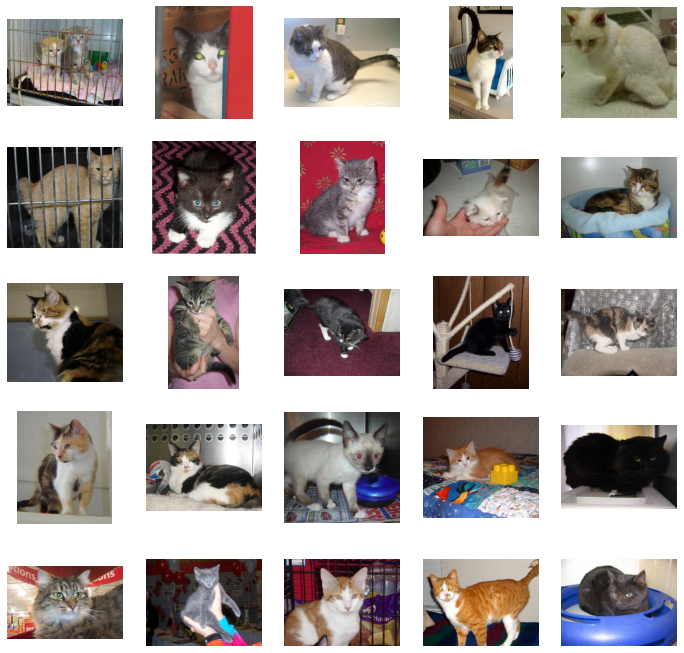

In [ ]:
plt.figure(figsize=(12,12))
i=1
for path in cat_image_path:
  plt.subplot(5,5,i)
  plt.axis('off')
  cat_image=mpimg.imread(path)
  plt.imshow(cat_image)
  i+=1

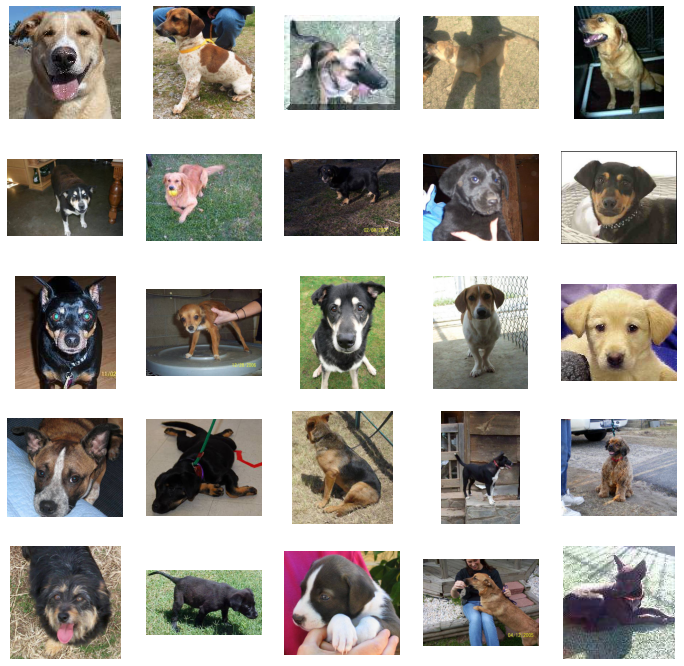

In [ ]:
plt.figure(figsize=(12,12))
i=1
for path in dog_image_path:
  plt.subplot(5,5,i)
  plt.axis('off')
  dog_image=mpimg.imread(path)
  plt.imshow(dog_image)
  i+=1

In [ ]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)


In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
val_datagen=ImageDataGenerator(rescale=1/255)
val_generator=val_datagen.flow_from_directory(
    validation_dir,
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(300,300,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 149, 149, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 147, 147, 128)     73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 71, 71, 128)       147584    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 35, 35, 128)     

In [ ]:
model.compile(optimizer = RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 30,
    verbose = 1
)

Epoch 1/30
63/63 [==============================] - 958s 15s/step - loss: 0.7280 - accuracy: 0.5015 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 958s 15s/step - loss: 0.6959 - accuracy: 0.5085 - val_loss: 0.9324 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 961s 15s/step - loss: 0.6965 - accuracy: 0.5100 - val_loss: 0.6907 - val_accuracy: 0.5480
Epoch 4/30
50/63 [======================>.......] - ETA: 2:52 - loss: 0.7238 - accuracy: 0.5682

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
plt.figure()
plt.plot(acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.legend()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure()
plt.plot(loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = 'Validation_loss')
plt.legend()